Looking at the apparently failed obs for ltt1445a

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
import stistools
from astropy.convolution import convolve, Box1DKernel
from pylab import cm  
from matplotlib.colors import LogNorm
from astropy.coordinates import SkyCoord, Distance
from astropy.time import Time

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [13]:
path = '/media/david/5tb_storage1/muscles/lt1445_1stlook/data/'
x1ds = glob.glob(path+'*x1d.fits')

oe8303020
G230L
250.0195


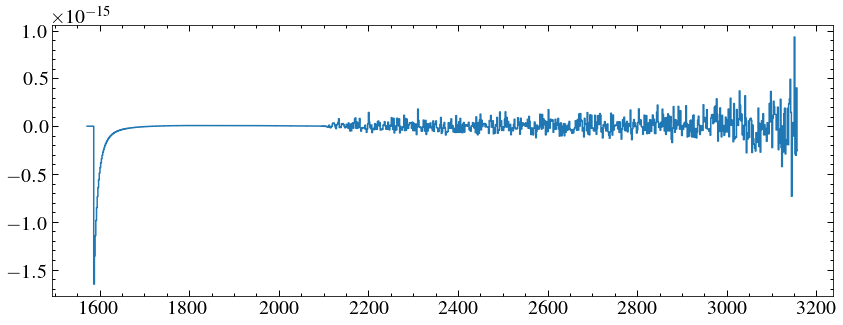

oe8303030
G140M
491.75925


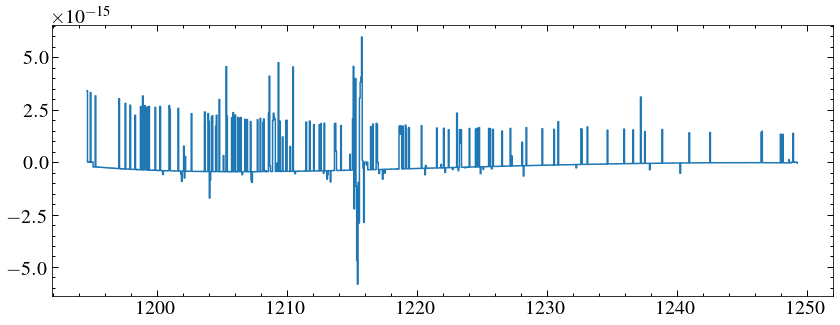

oe8303040
G140M
2824.1745


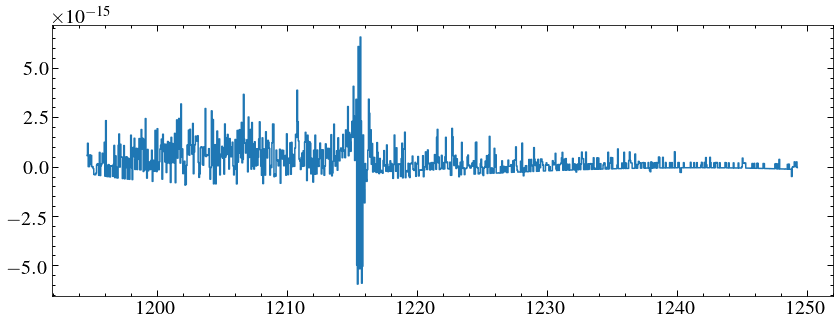

In [14]:
for x in x1ds:
    hdul = fits.open(x)
    if hdul[0].header['INSTRUME'] == 'STIS':
        print(hdul[0].header['ROOTNAME'])
        print(hdul[0].header['OPT_ELEM'])
        print(hdul[0].header['TEXPTIME'])
        data = hdul[1].data[0]
        plt.step(data['WAVELENGTH'], data['FLUX'], where='mid')
        plt.show()

oe8303030
G140M
491.75925


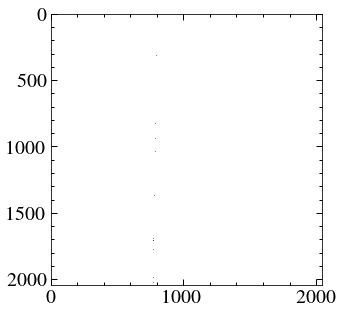

oe8303010
G430L
10.0


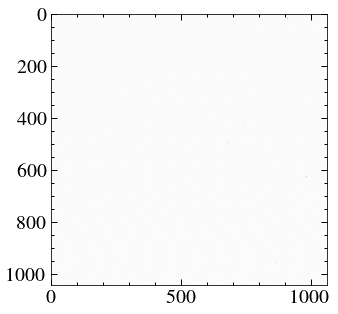

oe8303020
G230L
250.0195


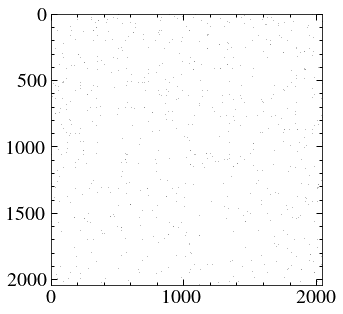

oe8303040
G140M
2824.1745


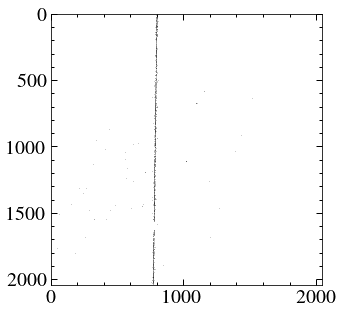

oe8303fcq
MIRVIS
1.636791


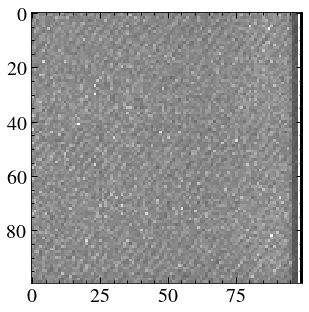

oe8303fdq
MIRVIS
3.0


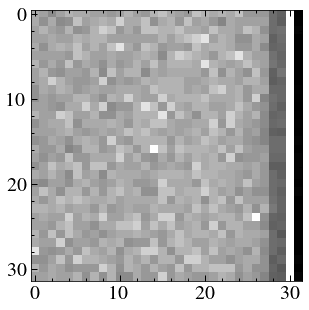

oe8303feq
MIRVIS
3.0


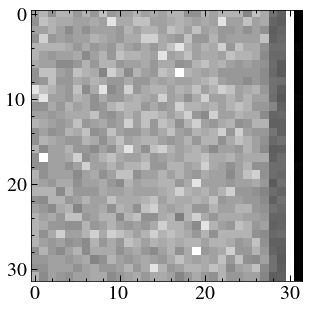

In [15]:
raws = glob.glob(path+'*raw.fits')
for x in raws:
    hdul = fits.open(x)
    if hdul[0].header['INSTRUME'] == 'STIS':
        print(hdul[0].header['ROOTNAME'])
        print(hdul[0].header['OPT_ELEM'])
        print(hdul[0].header['TEXPTIME'])
        data = hdul[1].data
        plt.imshow(data, cmap=cm.gray_r, norm = LogNorm())
        plt.show()
    hdul.close()
        

In [16]:
sc = SkyCoord(45.464125*u.deg, 
              -16.59336*u.deg, 
              pm_ra_cosdec= -369.2*u.mas/u.yr, 
              pm_dec=-268.3*u.mas/u.yr, 
              distance=Distance(parallax=0.1455*u.arcsec), 
              obstime=Time(2015.0, format='decimalyear'))
sc1 = sc.apply_space_motion(Time('2020-02-24'))
sc1

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (45.46357419, -16.59374361, 6.87285223)
 (pm_ra, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (-385.2447293, -268.29898636, 0.00016935)>

In [17]:
jits =  glob.glob(path+'*jit.fits')
jits

['/media/david/5tb_storage1/muscles/lt1445_1stlook/data/le8302010_jit.fits',
 '/media/david/5tb_storage1/muscles/lt1445_1stlook/data/le8302020_jit.fits',
 '/media/david/5tb_storage1/muscles/lt1445_1stlook/data/le8302buj_jit.fits',
 '/media/david/5tb_storage1/muscles/lt1445_1stlook/data/le8302btj_jit.fits',
 '/media/david/5tb_storage1/muscles/lt1445_1stlook/data/oe8303010_jit.fits',
 '/media/david/5tb_storage1/muscles/lt1445_1stlook/data/oe8303020_jit.fits',
 '/media/david/5tb_storage1/muscles/lt1445_1stlook/data/oe8303030_jit.fits',
 '/media/david/5tb_storage1/muscles/lt1445_1stlook/data/oe8303040_jit.fits',
 '/media/david/5tb_storage1/muscles/lt1445_1stlook/data/oe8303fcj_jit.fits',
 '/media/david/5tb_storage1/muscles/lt1445_1stlook/data/oe8303fdj_jit.fits',
 '/media/david/5tb_storage1/muscles/lt1445_1stlook/data/oe8303fej_jit.fits']

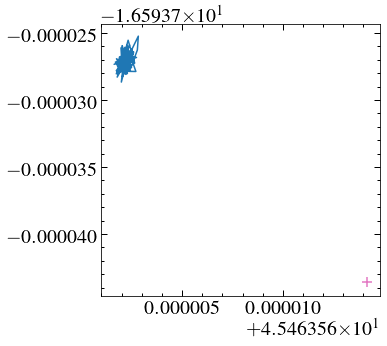

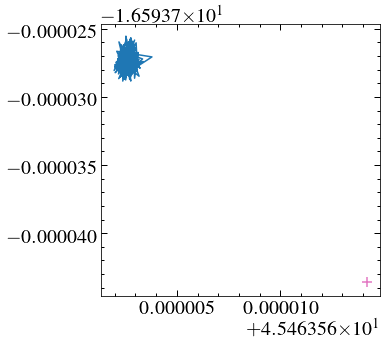

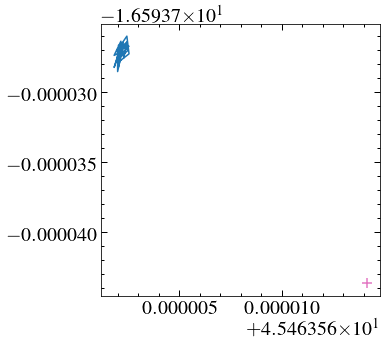

In [18]:
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection



for jit in jits[0:3]:
    ax, fig = plt.subplots(figsize=(5,5))
    data = fits.getdata(jit, 1)
    #plt.plot(data['SECONDS'], data['RA']/np.mean(data['RA']))
    #plt.plot(data['SECONDS'], data['DEC']/np.mean(data['DEC']))
    plt.plot(data['RA'], data['DEC'])
   # plt.scatter(sc.ra, sc.dec, marker='+', color='C5', s=100)
    plt.scatter(sc1.ra, sc1.dec, marker='+', color='C6', s=100)
  #  circle1 =plt.Circle((sc1.ra.value, sc1.dec.value), radius=0.26, color='k', ls='--')
   # ax.add_artist(circle1)
    
    #plt.plot(np.arange(len(data['SECONDS'])), data['SECONDS'])
    plt.show()

In [19]:
hdul[1]

In [20]:
sc1.ra.value

45.46357419107529

20200309 Stsci says aqistion was a success? Let's have a look at the NUV

In [22]:
path = '/media/david/5tb_storage1/muscles/lt1445_1stlook/data/'
x1dsums = glob.glob(path+'*x1dsum.fits')
x1dsums

['/media/david/5tb_storage1/muscles/lt1445_1stlook/data/le8302010_x1dsum.fits',
 '/media/david/5tb_storage1/muscles/lt1445_1stlook/data/le8302020_x1dsum.fits']

le8302bzq
G230L
500.0


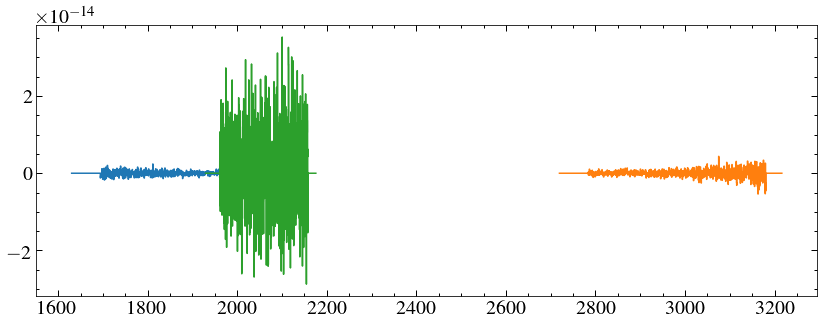

le8302c1q
G160M
6457.407999999999


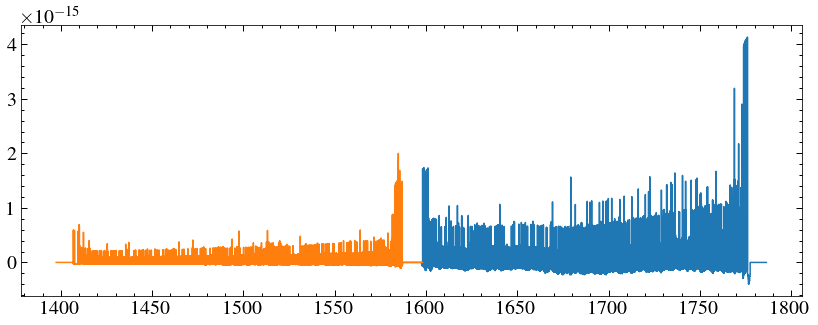

In [26]:
for x in x1dsums:
    hdul = fits.open(x)
    print(hdul[0].header['ROOTNAME'])
    print(hdul[0].header['OPT_ELEM'])
    print(hdul[1].header['EXPTIME'])
    data = hdul[1].data
    hdul.close()
    for dt in data:
        plt.step(dt['WAVELENGTH'], dt['FLUX'], where='mid')
    plt.show()

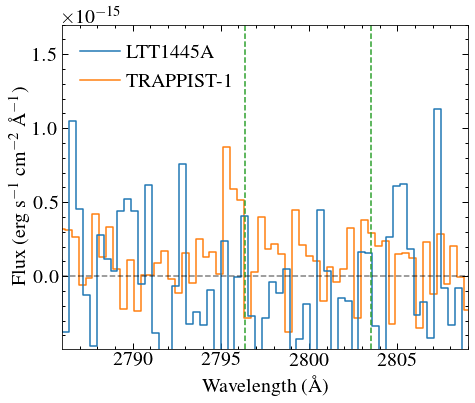

In [50]:
plt.figure(figsize=(7, 6))
mglines = [2796.35, 2803.53]
nuvmg = fits.getdata(x1dsums[0])[1]
mgw, mgf, mge = nuvmg['WAVELENGTH'], nuvmg['FLUX'], nuvmg['ERROR']
plt.step(mgw, mgf, where='mid', label = 'LTT1445A')
[plt.axvline(line, c='C2', ls='--') for line in mglines]
plt.xlim(2786, 2809)
t1dat = Table.read('../SEDs/trappist-1/test_files/components/hlsp_muscles_hst_cos_2mass-j23062928-0502285_g230l_v5_component-spec.ecsv')
tw, tf, te = t1dat['WAVELENGTH'], t1dat['FLUX'], t1dat['ERROR']
plt.step(tw, tf, where='mid', zorder=-1, label='TRAPPIST-1')
plt.ylim(-0.49e-15, 1.7e-15)
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.xlabel('Wavelength (\AA)')
plt.axhline(0, ls='--', c='k', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig('invisible_star.pdf')